In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [5]:
np.random.seed(0)
x = np.random.normal(0,1,size=(200,2))
y = np.array((x[:,0]**2) + (x[:,1]**2) < 2, dtype = 'int')

In [8]:
x.shape, y.shape

((200, 2), (200,))

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=233)

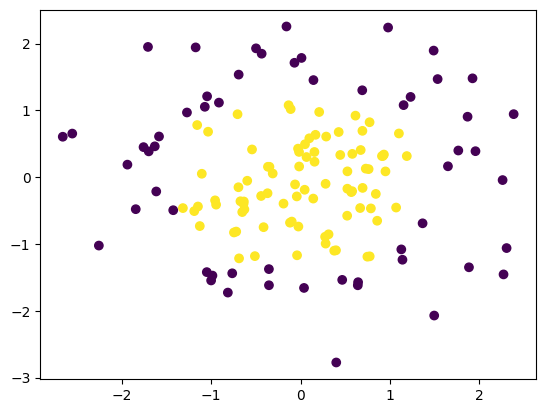

In [10]:
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)

不能用多项式线性回归应为圆没办法被线性表达

# 多项式逻辑回归

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [17]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [18]:
poly = PolynomialFeatures(degree=2)

In [19]:
poly.fit(x_train)

PolynomialFeatures()

In [20]:
x2 = poly.transform(x_train)
x2_test = poly.transform(x_test)   

In [23]:
x2[:5]    # x1, x2的degree<=2组合

array([[ 1.        , -0.11816405, -0.6801782 ,  0.01396274,  0.08037261,
         0.46264239],
       [ 1.        ,  1.92294203,  1.48051479,  3.69770604,  2.84694411,
         2.19192405],
       [ 1.        ,  0.57659082, -0.20829876,  0.33245697, -0.12010315,
         0.04338837],
       [ 1.        , -0.63432209, -0.36274117,  0.40236452,  0.23009474,
         0.13158115],
       [ 1.        , -1.17312341,  1.94362119,  1.37621852, -2.2801075 ,
         3.77766331]])

In [24]:
clf.fit(x2,y_train)

LogisticRegression()

In [27]:
clf.score(x2_test, y_test)

0.9833333333333333

In [29]:
clf.coef_

array([[ 1.97281545e-04,  3.96766746e-02, -3.15055323e-01,
        -2.58242079e+00,  1.46611797e-01, -2.96808690e+00]])

# 多分类

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=666)

In [46]:
x_train[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [6.2, 3.4, 5.4, 2.3],
       [5.1, 2.5, 3. , 1.1]])

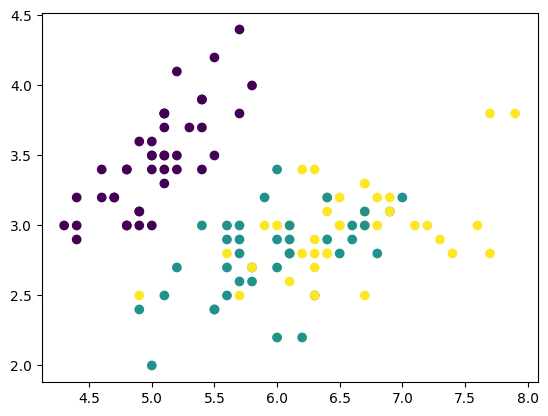

In [48]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

In [50]:
from sklearn.multiclass import OneVsRestClassifier

In [51]:
ovr = OneVsRestClassifier(clf)

In [52]:
ovr.fit(x_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [53]:
ovr.score(x_test, y_test)

0.9666666666666667

OVO

In [57]:
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(clf)

In [58]:
ovo.fit(x_train,y_train)
ovo.score(x_test, y_test)

1.0